### ED Figure 8

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
YS = [1991,1991,1991]
YE = np.arange(2010,2050+1,20)
ntime = np.size(YS)

In [3]:
dTdt_DZT_4km_Decadal_wthp  = xr.open_dataset('Heat_Flux_4km_WT.nc').dTdt_DZT_4km
dTdt_DZT_4km_Decadal_wthmp = xr.open_dataset('Heat_Flux_4km_WTM.nc').dTdt_DZT_4km
dTdt_DZT_4km_Decadal_mp    = dTdt_DZT_4km_Decadal_wthmp - dTdt_DZT_4km_Decadal_wthp

lat,lon = dTdt_DZT_4km_Decadal_wthmp.lat.values,dTdt_DZT_4km_Decadal_wthmp.lon.values
nlat,nlon = np.size(lat),np.size(lon)

dTdt_DZT_4km_Decadal = np.zeros((3,3,nlat,nlon))
jj=0
for ii in range(ntime):
    dTdt_DZT_4km_Decadal[0,ii,:,:] = dTdt_DZT_4km_Decadal_wthmp[jj,:,:] * cc
    dTdt_DZT_4km_Decadal[1,ii,:,:] = dTdt_DZT_4km_Decadal_wthp[jj,:,:]  * cc
    dTdt_DZT_4km_Decadal[2,ii,:,:] = dTdt_DZT_4km_Decadal_mp[jj,:,:]    * cc
    jj=jj+2

#### Plot

In [4]:
levs_temp = np.arange(-1.,1.1,0.1)*0.5
unit_temp = r'Heat Flux Anomaly [W m$^{-2}$]'
colormap_temp = 'bwr'

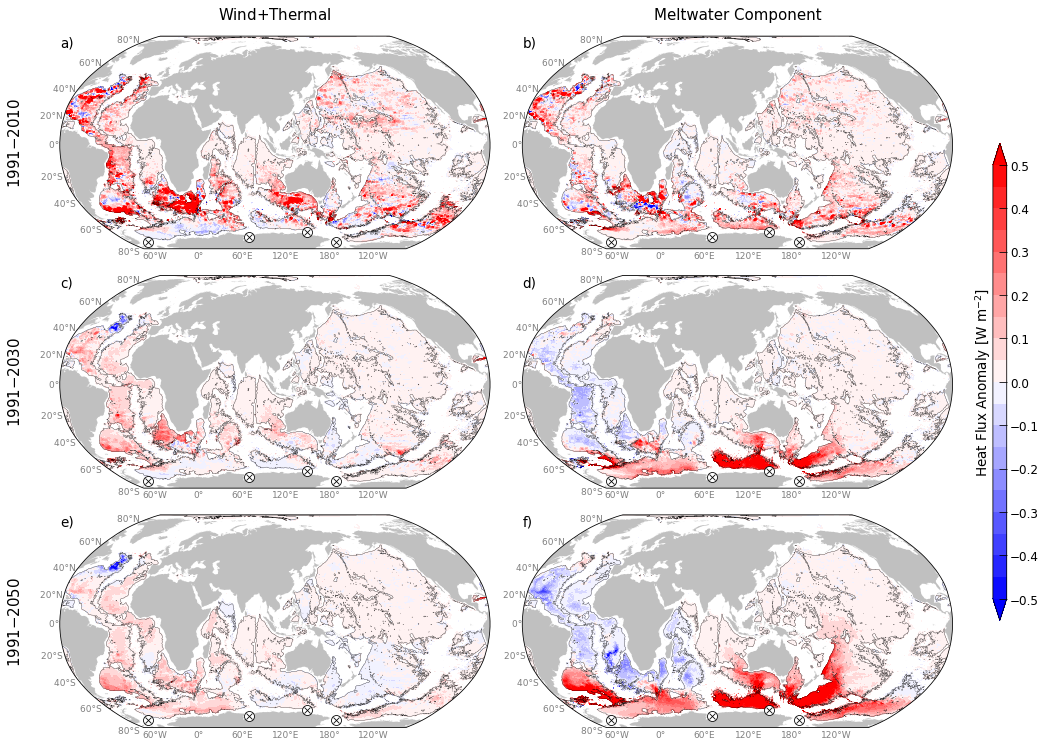

In [5]:
make_plot6_Robinson_FIG(dTdt_DZT_4km_Decadal[1:3,:,:],levs_temp,unit_temp,colormap_temp,PI)